In [1]:
import sys
import ipywidgets as widgets

sys.path.append("/Users/octavia/Dropbox/SVE_v2/utilities")
sys.path.append("/Users/octavia/Dropbox/SVE_v2/model")

my_modules = ['plot_functions','load_model_output', 'search_functions', 
              'plot_3D_functions', 'input_veg']
for mod in my_modules:
    if mod in sys.modules: 
        del sys.modules[mod]

from plot_functions import *
from plot_3D_functions import *
from search_functions import *
from load_model_output import *
from input_veg import *

No matched hydrographs here


In [2]:
project_dir = "/Users/octavia/Dropbox/SVE_v2/" 

## Chose a case


In [3]:
dirs = os.listdir(os.path.join(project_dir , 'model_output/'))
dirs = list(set(dirs) - {'.DS_Store'})
dirs = [d for d in dirs if "topo" in d]
# dirs = np.sort(dirs)
select_base_name = widgets.Dropdown(
    options=dirs,
    description='base_name:',
    disabled=False,
)
select_base_name

Dropdown(description='base_name:', options=('test_topo_gauss', 'test_topo'), value='test_topo_gauss')

In [4]:
base_name = select_base_name.value
base_dir = os.path.join(project_dir, 'model_output', base_name )
print(base_name)
print_input_params(base_dir, [ 'Lx', 'Ly', 'tr', 'dt_print', "tmax_scale"])

test_topo_gauss
batch:
	dt_sw : 0.001
sim:
	m_sigma : 2, 3
	m_scale : 1, 10
	m_edge : 20, 16
common:
	H_i : 0.0
	Lx : 100
	Ly : 100
	tr : 5
	dt_print : 10
	tmax_scale : 4


In [5]:
core = load_sims(base_dir)


In [6]:
core[['t_final', 'runtime_hr', 'early_exit']]

,t_final,runtime_hr,early_exit
"dt_sw-0.001/m_edge-20,m_scale-10,m_sigma-3/",1200,1.6547,False
"dt_sw-0.001/m_edge-20,m_scale-10,m_sigma-2/",1200,1.65914,False
"dt_sw-0.001/m_edge-16,m_scale-10,m_sigma-3/",1200,1.65913,False
"dt_sw-0.001/m_edge-16,m_scale-10,m_sigma-2/",1200,1.65493,False
"dt_sw-0.001/m_edge-20,m_scale-1,m_sigma-2/",1200,1.60181,False
"dt_sw-0.001/m_edge-20,m_scale-1,m_sigma-3/",1200,1.59001,False
"dt_sw-0.001/m_edge-16,m_scale-1,m_sigma-2/",1200,1.60019,False
"dt_sw-0.001/m_edge-16,m_scale-1,m_sigma-3/",1200,1.57486,False


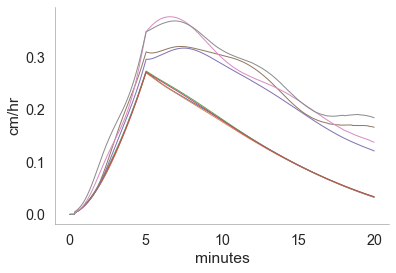

In [7]:
core = core[core.early_exit == 0]
fig = plot_hydrographs(core)

In [8]:
sim = core.iloc[1]


In [9]:
def plot_3D_micro(sim, plot_infl=False):
    """
    Plot veg pattern as surface
    """
    fig = plt.figure(figsize=(11, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax = fix_3D_axes(ax)

    norm = plt.Normalize()
    isveg = sim.veg.copy()
    isveg = isveg.astype(float)

    isveg[isveg == 0] = 0.1
    isveg[isveg == 1] = 0.8
    isveg[0, -1] = 0
    isveg[1, -1] = 1
    veg_colors = cm.Greens(norm(isveg))

    xc = sim.xc
    yc = sim.yc
    topo = sim.zc*1.01 + sim.xc*sim.So 

    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.plot_surface(xc, yc , topo,
                    facecolors=veg_colors,
                    rstride=1, cstride=1,
                    linewidth=0,
                    antialiased=True,
                    shade=False,
                    alpha=0.5)

    ax.view_init(25, 295)

    if plot_infl:
        norm = plt.Normalize(vmin=0)
        colors = cm.Blues(norm(sim.infl_2d))
        ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

        ax.plot_surface(xc, yc, topo, facecolors=colors,
                             rstride=1, cstride=1, linewidth=1,
                             antialiased=True, shade=True)
    return fig, ax


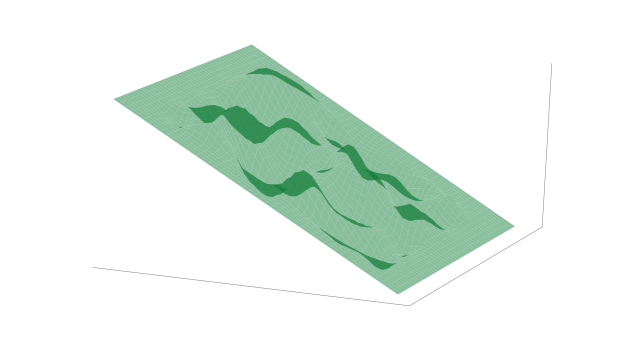

In [10]:
plot_3D_micro(sim);

In [11]:
sim = core.iloc[4]
if sim.fV < 1:
    triptych(sim)

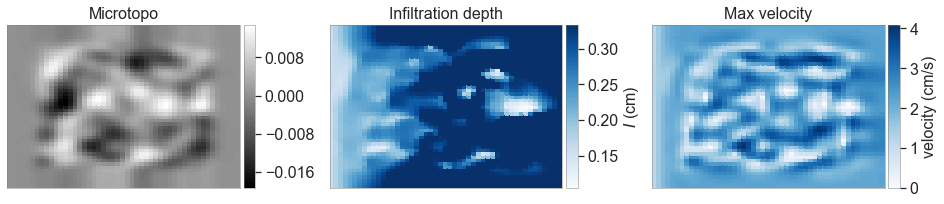

In [12]:
if sim.topo != "plane":
        triptych_micro(sim)

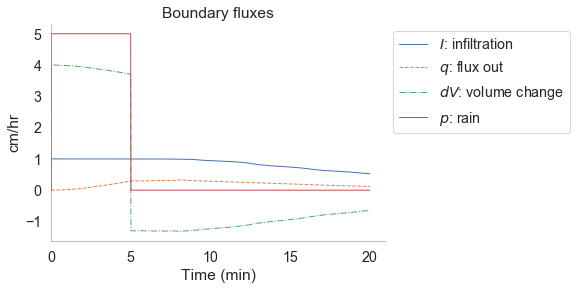

In [13]:
summarize_fluxes(sim);